In [1]:
import cptac
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import Delta_Correlation as dc
from statannot import add_stat_annotation
import numpy as np

In [2]:
luad = cptac.Luad()

In [13]:
trans_df = pd.read_csv('data/Transcriptomics_differential_expression_df.csv')
prot_df = pd.read_csv('data/Proteomics_differential_expression_df.csv')

In [14]:
trans_df = trans_df[trans_df.Cancer == 'LUAD']
prot_df = prot_df[prot_df.Cancer == 'LUAD']
trans_df = trans_df[trans_df.FDR > 0.05]
prot_df = prot_df[prot_df.FDR > 0.05]
trans_df = trans_df[np.array(trans_df.Log2_fold_change < 1) &
                   np.array(trans_df.Log2_fold_change > -1)]
prot_df = prot_df[np.array(prot_df.Log2_fold_change < 1) &
                   np.array(prot_df.Log2_fold_change > -1)]
genes = set(prot_df.Gene) & set(trans_df.Gene)
len(genes)

203

In [15]:
delta_corr_df = pd.read_csv('data/delta_correlation_df.csv')
delta_corr_df = delta_corr_df[delta_corr_df.Cancer == 'LUAD']
delta_corr_df = delta_corr_df[delta_corr_df.FDR < 0.05]
delta_corr_df = delta_corr_df[delta_corr_df.Gene.isin(genes)]
delta_corr_df

,Gene,Delta_Correlation,P_Value,FDR,Cancer
40292,ABCD4,0.358594,1.248583e-02,2.196869e-02,LUAD
40298,ABHD10,0.381106,3.124585e-03,6.398657e-03,LUAD
40372,ACSF2,0.407805,1.047909e-06,4.748159e-06,LUAD
40515,AGR3,0.323819,1.034158e-11,1.175434e-10,LUAD
40519,AGTRAP,0.403405,3.363554e-05,1.097793e-04,LUAD
...,...,...,...,...,...
50129,ZKSCAN8,0.334365,1.999721e-02,3.339810e-02,LUAD
50168,ZNF277,0.344147,1.459478e-02,2.518163e-02,LUAD
50192,ZNF397,0.594400,2.100252e-05,7.185863e-05,LUAD
50203,ZNF446,0.350836,1.923620e-02,3.229255e-02,LUAD


In [16]:
df = dc.get_prot_trans_df(luad)
df = df[df.Gene.isin(delta_corr_df.Gene)]
df

cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (C:\Users\nanel\Documents\GitHub\pancancerProteinMRNA\notebook_steps_Spearman\Delta_Correlation.py, line 26)
cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (C:\Users\nanel\Documents\GitHub\pancancerProteinMRNA\notebook_steps_Spearman\Delta_Correlation.py, line 36)


,Patient_ID,Gene,Proteomics,Tissue,Transcriptomics
4840,C3L-00001,ABCD4,-1.1461,Tumor,2.8219
4841,C3L-00009,ABCD4,0.0003,Tumor,3.0846
4842,C3L-00080,ABCD4,0.2796,Tumor,3.8841
4843,C3L-00083,ABCD4,-1.4413,Tumor,4.3301
4844,C3L-00093,ABCD4,-1.1475,Tumor,2.9459
...,...,...,...,...,...
2204245,C3N-02529.N,ZSCAN26,0.8416,Normal,3.0724
2204246,C3N-02572.N,ZSCAN26,-1.8386,Normal,3.2616
2204247,C3N-02582.N,ZSCAN26,0.9460,Normal,3.1517
2204249,C3N-02587.N,ZSCAN26,0.0670,Normal,2.9808


In [17]:
#g = sns.FacetGrid(data = df, col= 'Gene', col_wrap=10, hue = 'Tissue', sharex = False, sharey = False)
#g.map_dataframe(sns.regplot, x = 'Transcriptomics', y = 'Proteomics')

In [18]:
df = df[df.Gene.isin(['SCAMP2', 'ABCD4', 'ARID5B', 'FCGR2B', 'MFHAS1', 'MAP2K1', 'TSSC4'])]

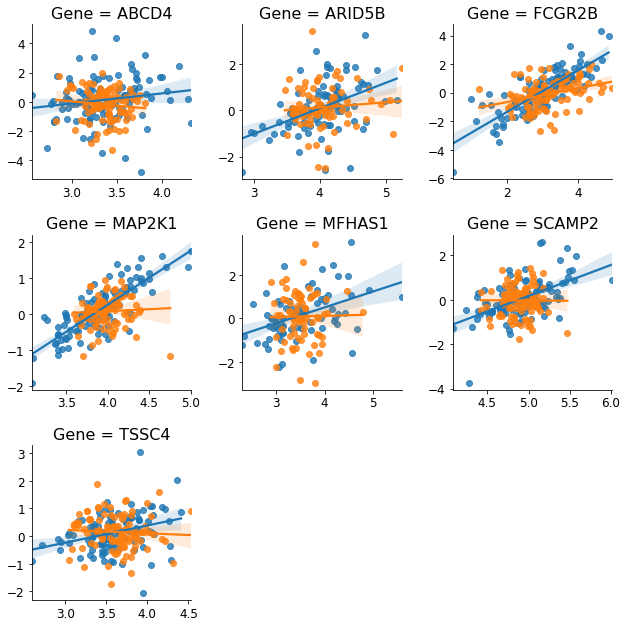

In [19]:
g = sns.FacetGrid(data = df, col= 'Gene', col_wrap=3, hue = 'Tissue', sharex = False, sharey = False)
g.map_dataframe(sns.regplot, x = 'Transcriptomics', y = 'Proteomics')

cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (C:\Users\nanel\Documents\GitHub\pancancerProteinMRNA\notebook_steps_Spearman\Delta_Correlation.py, line 26)
cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (C:\Users\nanel\Documents\GitHub\pancancerProteinMRNA\notebook_steps_Spearman\Delta_Correlation.py, line 36)


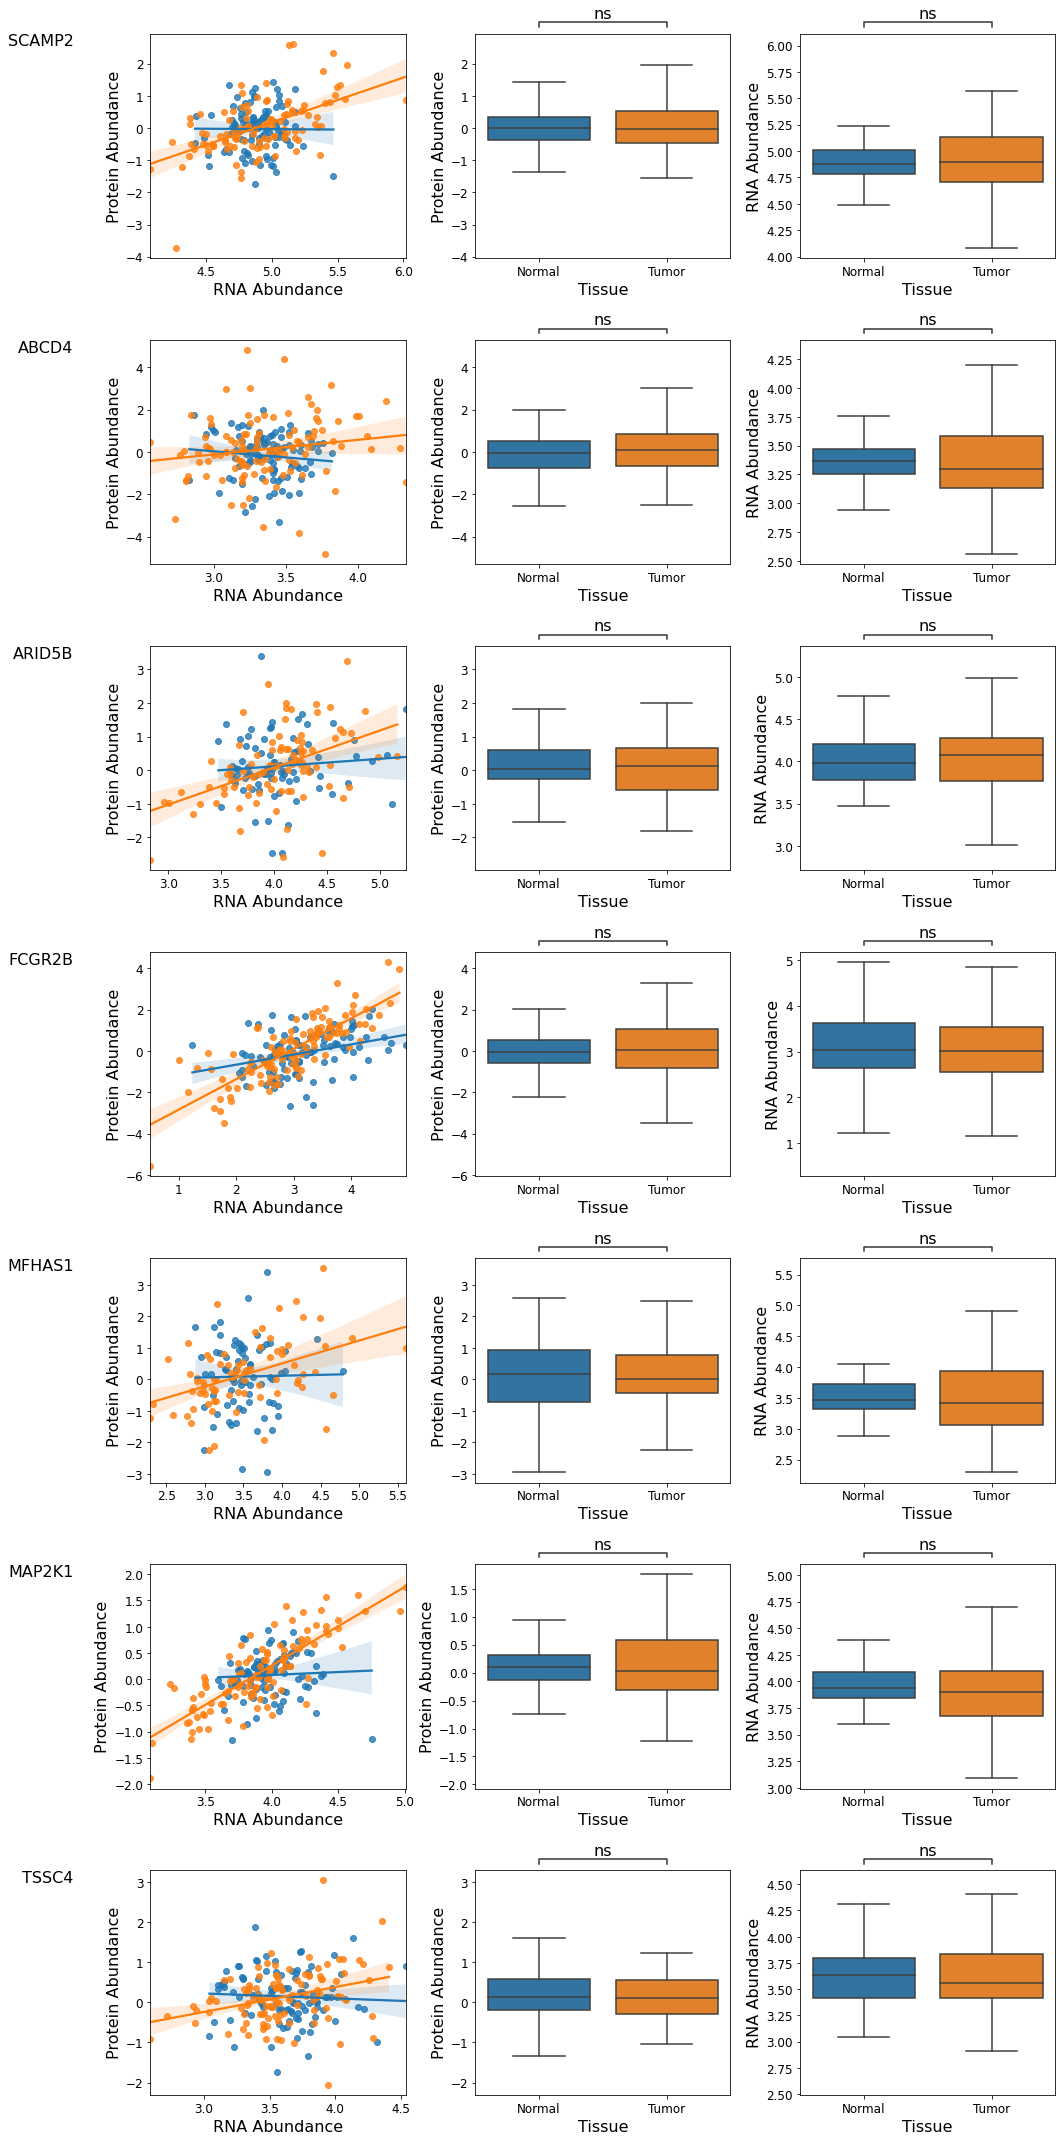

In [22]:
df = dc.get_prot_trans_df(luad)
df.Tissue = [tissue.title() for tissue in df.Tissue]
df = df.rename(columns = {'Proteomics': 'Protein Abundance', 'Transcriptomics': 'RNA Abundance'})
genes = ['SCAMP2', 'ABCD4', 'ARID5B', 'FCGR2B', 'MFHAS1', 'MAP2K1', 'TSSC4']
df = df[df.Gene.isin(genes)]
diff_prot = pd.read_csv('data/Proteomics_differential_expression_df.csv')
diff_prot = diff_prot[diff_prot.Gene.isin(genes)]
diff_prot = diff_prot[diff_prot.Cancer == 'LUAD']
diff_trans = pd.read_csv('data/Transcriptomics_differential_expression_df.csv')
diff_trans = diff_trans[diff_trans.Gene.isin(genes)]
diff_trans = diff_trans[diff_trans.Cancer == 'LUAD']
sns.set_context(rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16, 'xtick.labelsize': 12, 'ytick.labelsize': 12}) 
fig, ax = plt.subplots(nrows = 7, ncols = 3, figsize=(15,30))
plt.subplots_adjust(hspace = 0.3)
i = 0
for gene in genes:
    gene_df = df[df.Gene == gene]
    trans_pval = diff_trans[diff_trans.Gene == gene].FDR
    trans_pval = np.array(trans_pval)
    prot_pval = diff_prot[diff_prot.Gene == gene].FDR
    prot_pval = np.array(prot_pval)
    plt.sca(ax[i][0])
    plt.gca().text(-0.3, 1, gene, transform = plt.gca().transAxes, 
                 fontsize = 16, va = 'top', ha = 'right')
    sns.regplot(data = gene_df[gene_df.Tissue == 'Normal'], y = 'Protein Abundance', 
                   x = 'RNA Abundance')
    sns.regplot(data = gene_df[gene_df.Tissue == 'Tumor'], y = 'Protein Abundance', 
                   x = 'RNA Abundance')
    plt.sca(ax[i][1])
    g = sns.boxplot(data = gene_df, x = 'Tissue', y = 'Protein Abundance', order = ['Normal', 'Tumor'], fliersize = 0)
    test_results = add_stat_annotation(g, data=df, x='Tissue', y='Protein Abundance', order = ['Normal', 'Tumor'],
                                   box_pairs=[('Normal', 'Tumor')],
                                   pvalues = prot_pval, text_format='star',
                                   loc='outside', perform_stat_test=False, verbose = False)
    plt.sca(ax[i][2])
    g2 = sns.boxplot(data = gene_df, x = 'Tissue', y = 'RNA Abundance', order = ['Normal', 'Tumor'], fliersize = 0)
    test_results = add_stat_annotation(g2, data=df, x='Tissue', y='RNA Abundance', order = ['Normal', 'Tumor'],
                                   box_pairs=[('Normal', 'Tumor')],
                                   pvalues = trans_pval, text_format='star',
                                   loc='outside', perform_stat_test=False, verbose = False)
    i += 1

fig.tight_layout()
#plt.savefig('Figures/Figure 2) Correlation vs Differential Expression.png')

possible replacements:
scamp2: - to + corr change, secratory membrane charries, involved in vesicular transport 
abcd4: - to + corr change, atp-binding casset transporter, involved in import of fatty acids to organelles 
arid5b: flat to + corr change, AT-rich interactve domain protein, GWAS studies associate with childhood leukemia in ethniclally diverse populations
emsy: clear - to + corr change, shown to interact with BRAC2
fcgr2b: slight + to very positive corr change, participates in phagocytosis of immune complexes and antibody regulation in B lymphocytes
mfhas1: flat to + corr change, malignant fibrous histiocytoma-amplified sequence, uniprot tumor suppressor, involved in immutity and inflamatory response 
map2k1: flat to + corr change, map kinase signaling cascade protein 
pitnb:  clear - to + change, phosphatidyliositol transfer protein 
tssc4: clear - to + change, tumor suppressing subchromosomal transferable fragment, associated with Beckwith-Wiedemann syndrome, Wilms tumor, rhabdomyosarcoma, adrenocortical carcinoma, and lung, ovarian, and breast cancer 

In [23]:
corr_df = pd.read_csv('data/delta_correlation_df.csv')
corr_df = corr_df[corr_df.Cancer == 'LUAD']
corr_df[corr_df.Gene == 'MAP2K1']

,Gene,Delta_Correlation,P_Value,FDR,Cancer
45066,MAP2K1,0.600129,1.193920e-07,6.516356e-07,LUAD
